<h1><center> Facial Emotion Perception</center></h1>




CONTEXT








The aim of the facial emotion perception  is identifying and recognizing  facial emotions and also can predict emotions

The data set used for training is the Kaggle FER2013 emotion recognition data set : https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data


In [ ]:
#unzipping file
!tar  -xf /content/drive/My\ Drive/fer2013.tar.gz

tar: /content/drive/My Drive/fer2013.tar.gz: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now


# Connect Google Drive 

In [ ]:
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install scikit-plot

#IMPORT LIABRARIES
 

*   Python : 3.7
*   Tensorflow : 2.4.1
*   Numpy : 1.19.5
*   Seaborn : 0.11.1
*   Pandas : 1.1.5
*   pip :  19.3.1













In [ ]:

import numpy as np #linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #data visualization
import seaborn as sns#plotting df
import math
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



from sklearn.metrics import accuracy_score
import imutils

import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import mnist

#accessing webcam

import cv2
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

import dlib
### Deep Learning models ###
import tensorflow.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.utils import np_utils
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import Sequential #Initialise neural network model as a sequential network
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, SeparableConv2D
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, SeparableConv2D, ZeroPadding2D, UpSampling2D, BatchNormalization, Input, GlobalAveragePooling2D, AveragePooling2D
#from tensorflow. keras.utils import np_utils
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import models
from keras.utils.vis_utils import plot_model
from tensorflow.keras.layers import Input, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.applications import densenet
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

import h5py


from keras.models import model_from_yaml
import pickle
### Visualization ###
!pip3 install --quiet ggplot
#from ggplot import *
import time
from sklearn.manifold import TSNE

from vis.utils import utils
import scikitplot

import cv2; [x for x in dir(cv2) if x.startswith('FONT_')]

     |████████████████████████████████| 2.2MB 8.1MB/s 


['FONT_HERSHEY_COMPLEX',
 'FONT_HERSHEY_COMPLEX_SMALL',
 'FONT_HERSHEY_DUPLEX',
 'FONT_HERSHEY_PLAIN',
 'FONT_HERSHEY_SCRIPT_COMPLEX',
 'FONT_HERSHEY_SCRIPT_SIMPLEX',
 'FONT_HERSHEY_SIMPLEX',
 'FONT_HERSHEY_TRIPLEX',
 'FONT_ITALIC']

#Import csv file

In [ ]:
path = "/content/drive/MyDrive/fer2013.csv"
df = pd.read_csv(path)
print(df)



FileNotFoundError: ignored

In [ ]:
 df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
shape = df.shape
print(shape)


(35887, 3)


In [ ]:
df.dtypes	
#return the dtypes in the DataFrame.


emotion     int64
pixels     object
Usage      object
dtype: object

In [ ]:
df.emotion.unique()

array([0, 2, 4, 6, 3, 5, 1])

In [ ]:
emotion_label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}

In [ ]:
df.emotion.value_counts()#decending order


3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [ ]:
df.emotion

0        0
1        0
2        2
3        4
4        6
        ..
35882    6
35883    3
35884    0
35885    3
35886    2
Name: emotion, Length: 35887, dtype: int64

In [ ]:
df.corr()#correlation

,emotion
emotion,1.0


# Data Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


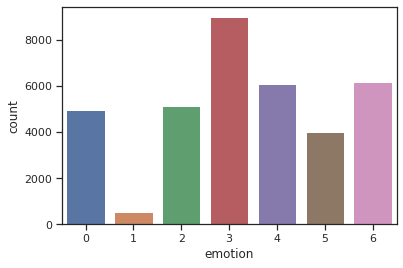

In [ ]:
sns.set_theme(style="ticks")

sns.countplot(df.emotion) 
plt.show() 


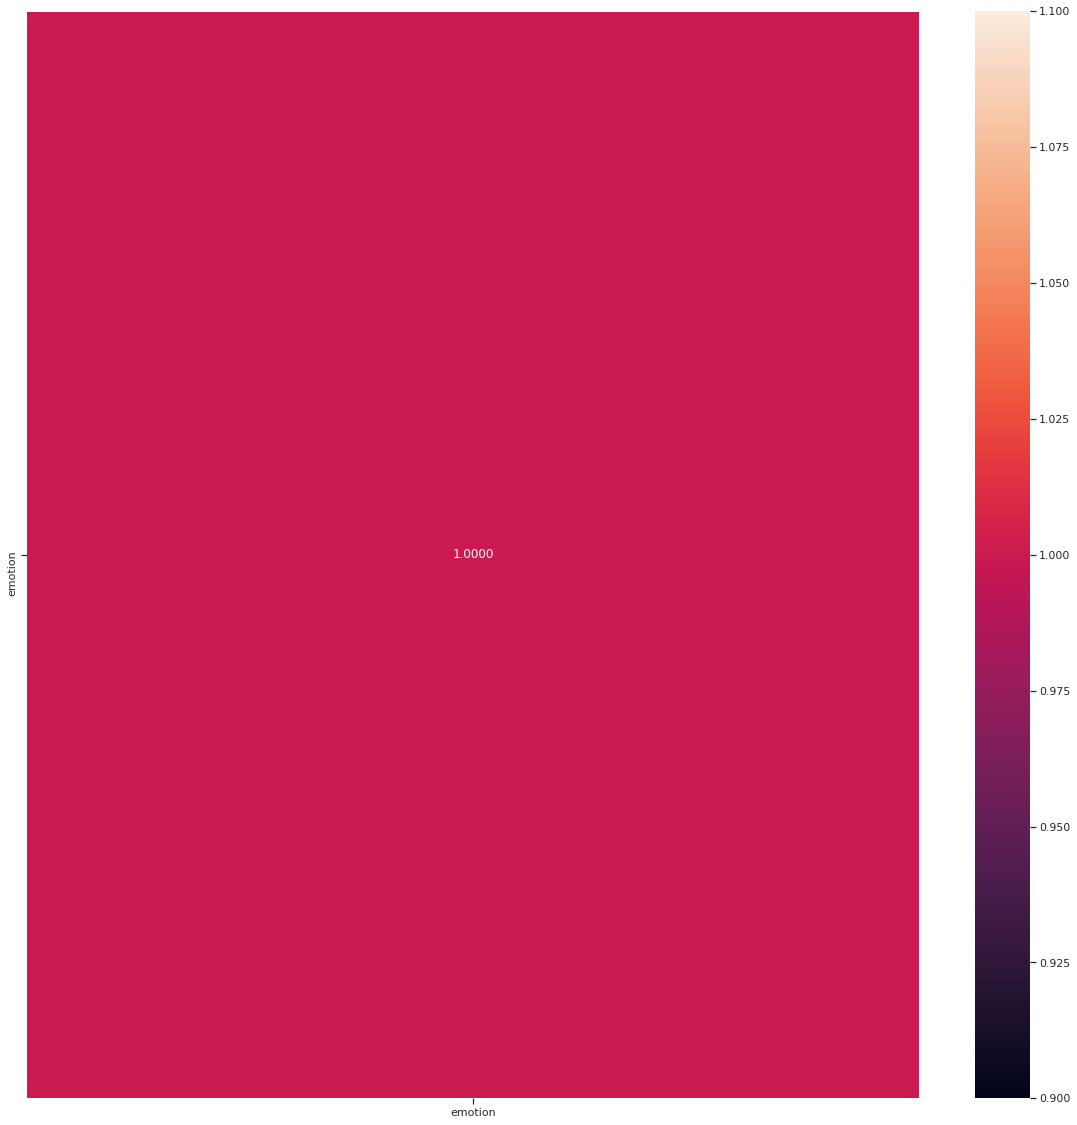

In [ ]:
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(),annot = True, linewidths = 0.3, fmt = ".4f", ax=ax)  
plt.show()





In [ ]:
df.head(15)


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training
9,2,255 254 255 254 254 179 122 107 95 124 149 150...,Training


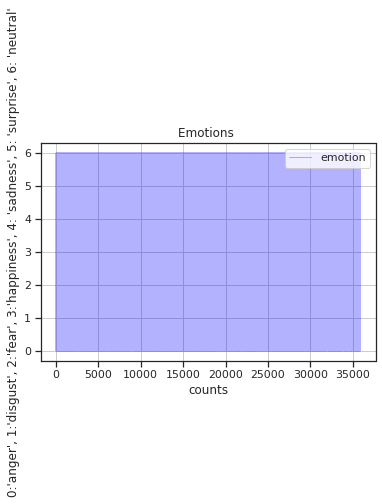

In [ ]:

df.plot(kind="line",color="blue",label="surprise",linewidth=1,alpha=0.3,grid=True,linestyle="-")

plt.legend(loc="upper right")
plt.xlabel("counts")
plt.ylabel("0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'")
plt.title("Emotions ")
plt.show()

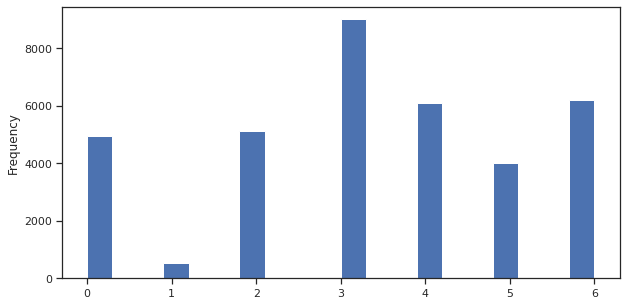

In [ ]:
df.emotion.plot(kind="hist",bins=20,figsize=(10,5))
plt.show()
plt.style.use('dark_background')

In [ ]:
math.sqrt(len(df.pixels[0].split(' ')))

48.0

In [ ]:
dic = { 0: "Angry",
       1: "Disgust",
       2:"Fear",
       3:"Happy",
       4:"Sad",
       5:"Surprise",
       6:"Neutral"}
       

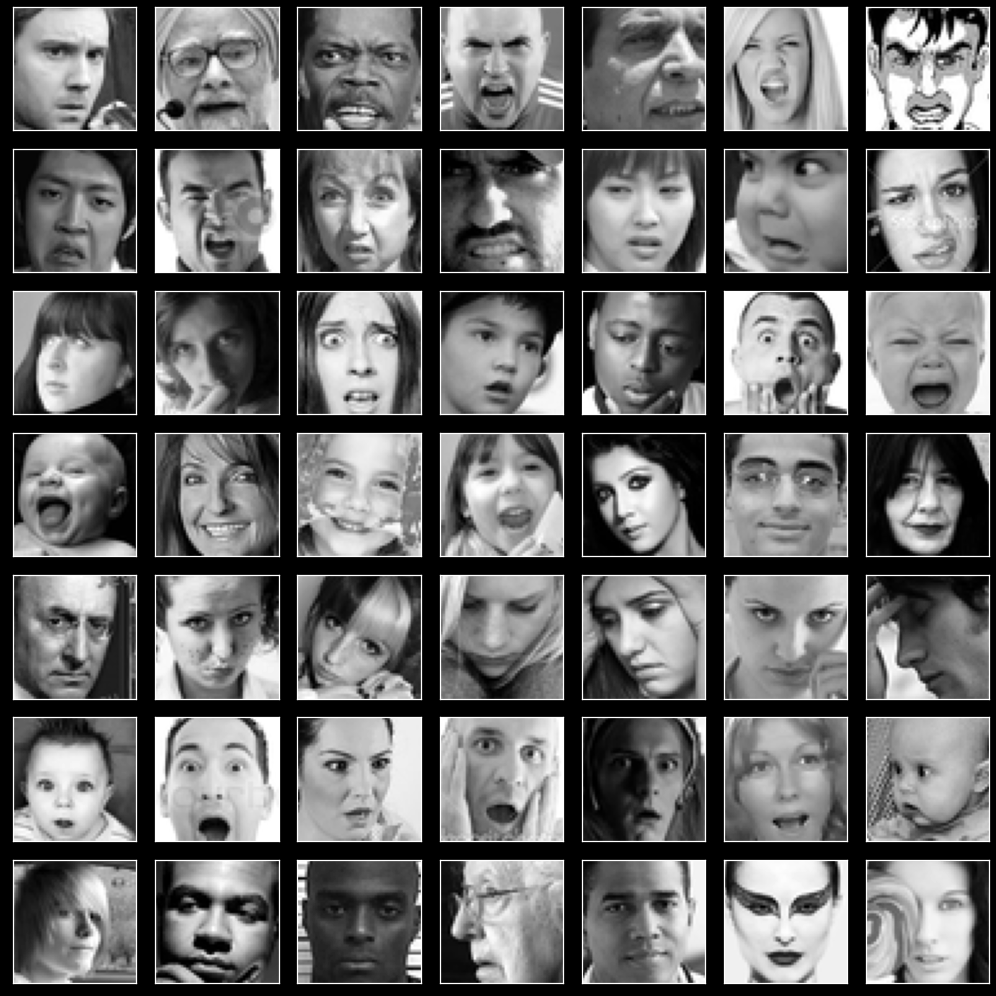

In [ ]:
fig =plt.figure(1, (14, 14))

k = 0
for label in sorted(df.emotion.unique()):
    for j in range(7):
        px = df[df.emotion==label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')

        k = k + 1
        ax = plt.subplot(7, 7, k)
        ax.imshow(px, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
    
        plt.tight_layout()

In [ ]:
img_array = df.pixels.apply(lambda x: np.array(x.split(' ')).reshape(48, 48, 1).astype('float32'))
img_array = np.stack(img_array, axis=0)

#  AutoEncoding for Data Visualization

---



In [ ]:

INTERESTED_LABELS = [3, 4, 6]


In [ ]:
df = df[df.emotion.isin(INTERESTED_LABELS)]
df.shape

(21264, 3)

In [ ]:
img_array = df.pixels.apply(lambda x: np.array(x.split(' ')).reshape(48, 48, 1).astype('float32'))
img_array = np.stack(img_array, axis=0)

In [ ]:
img_array.shape

(21264, 48, 48, 1)

In [ ]:
le = LabelEncoder()
img_labels = le.fit_transform(df.emotion)
img_labels = np_utils.to_categorical(img_labels)
img_labels.shape

(21264, 3)

In [ ]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{3: 0, 4: 1, 6: 2}


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(img_array, img_labels,
                                                    shuffle=True, stratify=img_labels,
                                                    test_size=0.1, random_state=42)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((19137, 48, 48, 1), (2127, 48, 48, 1), (19137, 3), (2127, 3))

In [ ]:
img_width = X_train.shape[1]
img_height = X_train.shape[2]
img_depth = X_train.shape[3]
num_classes = y_train.shape[1]

In [ ]:

#normalizing data
X_train = X_train / 255.
X_valid = X_valid / 255.

In [ ]:
shape_x = 48
shape_y = 48
nRows,nCols,nDims = X_train.shape[1:]
input_shape = (nRows, nCols, nDims)
classes = np.unique(y_train)
nClasses = len(classes)

In [ ]:

input_img = Input(shape=(shape_x, shape_y, 1))
# Ecoding
x = Conv2D(1, (5, 5), padding='same', activation='relu')(input_img)
x = MaxPooling2D(pool_size=(2,2), padding='same')(x)
x = Conv2D(1, (5, 5), padding='same', activation='relu')(x)
encoded = MaxPooling2D(pool_size=(2,2), padding='same')(x)


# Decoding
x = Conv2D(1,(5, 5), padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(1,(5, 5), padding='same')(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(1,(3, 3), padding='same', activation = 'linear')(x)

In [ ]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 48, 48, 1)         26        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 1)         26        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 1)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 1)         26        
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 24, 24, 1)         0     

In [ ]:
epochs = 30
batch_size = 16

history = autoencoder.fit( X_train.reshape(-1, shape_x, shape_y, 1), X_train.reshape(-1, shape_x, shape_y, 1), batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/30
957/957 [==============================] - 37s 4ms/step - loss: 0.1122 - val_loss: 0.0645
Epoch 2/30
957/957 [==============================] - 3s 3ms/step - loss: 0.0646 - val_loss: 0.0634
Epoch 3/30
957/957 [==============================] - 3s 3ms/step - loss: 0.0634 - val_loss: 0.0631
Epoch 4/30
957/957 [==============================] - 3s 4ms/step - loss: 0.0621 - val_loss: 0.0227
Epoch 5/30
957/957 [==============================] - 3s 3ms/step - loss: 0.0181 - val_loss: 0.0132
Epoch 6/30
957/957 [==============================] - 3s 4ms/step - loss: 0.0129 - val_loss: 0.0122
Epoch 7/30
957/957 [==============================] - 3s 4ms/step - loss: 0.0121 - val_loss: 0.0118
Epoch 8/30
957/957 [==============================] - 3s 4ms/step - loss: 0.0116 - val_loss: 0.0113
Epoch 9/30
957/957 [==============================] - 3s 4ms/step - loss: 0.0113 - val_loss: 0.0112
Epoch 10/30
957/957 [==============================] - 3s 3ms/step - loss: 0.0112 - val_loss: 0.011

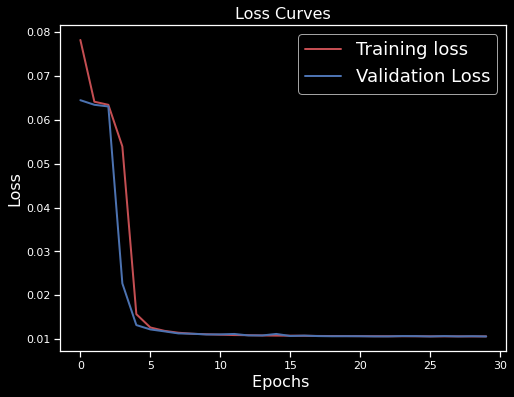

In [ ]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=2.0)
plt.plot(history.history['val_loss'],'b',linewidth=2.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
plt.style.use('dark_background')

# Load data

the load_data() access the FER2013.csv dataset from Google Drive and then it start reading it line by line. This data  has 35,887 images, which are classified into seven categories - Angry, Disgust, Fear, Happy, Sad, Surprsie, and Neutral.

In [ ]:
def load_data(dataset_path):
   #classes = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprsie', 'Neutral']  #We will be dealing with seven different types of emotions.

  data = []
  test_data = []
  test_labels = []
  labels =[]

  with open(dataset_path, 'r') as file:
      for line_no, line in enumerate(file.readlines()):
          if 0 < line_no <= 35887:
            curr_class, line, set_type = line.split(',')
            image_data = np.asarray([int(x) for x in line.split()]).reshape(48, 48)#Creating a list out of the string then converting it into a 2-Dimensional numpy array.
            image_data =image_data.astype(np.uint8)/255.0
            
            if (set_type.strip() == 'PrivateTest'):
              
              test_data.append(image_data)
              test_labels.append(curr_class)
            else:
              data.append(image_data)
              labels.append(curr_class)
      
      test_data = np.expand_dims(test_data, -1)
      test_labels = to_categorical(test_labels, num_classes = 7)
      data = np.expand_dims(data, -1)   
      labels = to_categorical(labels, num_classes = 7)
    
      return np.array(data), np.array(labels), np.array(test_data), np.array(test_labels)

In [ ]:






dataset_path = '/content/drive/MyDrive/fer2013.csv'
train_data, train_labels, test_data, test_labels = load_data(dataset_path)
#train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size = test_size,random_state = seed)

print("Number of images in Training set:", len(train_data))
print("Number of images in Test set:", len(test_data))     

Number of images in Training set: 32298
Number of images in Test set: 3589


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(img_array, img_labels,
                                                    shuffle=True, stratify=img_labels,
                                                    test_size=0.1, random_state=42)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((19137, 48, 48, 1), (2127, 48, 48, 1), (19137, 3), (2127, 3))

In [ ]:
img_width = X_train.shape[1]
img_height = X_train.shape[2]
img_depth = X_train.shape[3]
num_classes = y_train.shape[1]

# BUILD MODEL

In [ ]:
def build_net(optim):
    """
    This is a Deep Convolutional Neural Network (DCNN).
  
    """
    
    net = Sequential()

    net.add(
        Conv2D(
            filters=64,
            kernel_size=(5,5),
            input_shape=(img_width, img_height, img_depth),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_1'
        )
    )
    net.add(BatchNormalization(name='batchnorm_1'))
    net.add(
        Conv2D(
            filters=64,
            kernel_size=(5,5),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_2'
        )
    )
    net.add(BatchNormalization(name='batchnorm_2'))
    
    net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_1'))
    net.add(Dropout(0.4, name='dropout_1'))

    net.add(
        Conv2D(
            filters=128,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_3'
        )
    )
    net.add(BatchNormalization(name='batchnorm_3'))
    net.add(
        Conv2D(
            filters=128,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_4'
        )
    )
    net.add(BatchNormalization(name='batchnorm_4'))
    
    
    net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_2'))
    net.add(Dropout(0.4, name='dropout_2'))

    net.add(
        Conv2D(
            filters=256,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_5'
        )
    )
    net.add(BatchNormalization(name='batchnorm_5'))
    net.add(
        Conv2D(
            filters=256,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_6'
        )
    )
    net.add(BatchNormalization(name='batchnorm_6'))
    
    net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_3'))
    net.add(Dropout(0.5, name='dropout_3'))

    net.add(Flatten(name='flatten'))
        
    net.add(
        Dense(
            128,
            activation='elu',
            kernel_initializer='he_normal',
            name='dense_1'
        )
    )
    net.add(BatchNormalization(name='batchnorm_7'))
    
    net.add(Dropout(0.6, name='dropout_4'))
    
    net.add(
        Dense(
            num_classes,
            activation='softmax',
            name='out_layer'
        )
    )
    
    net.compile(
        loss='binary_crossentropy',
        optimizer=optim,
        metrics=['accuracy']
    )
    
    net.summary()
    
    return net


In [ ]:
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    
    patience=11,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1,
)

callbacks = [
    early_stopping,
    lr_scheduler,
]
print(early_stopping)     

In [ ]:
 #As the data in hand is less as compared to the task so ImageDataGenerator is good to go.
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
)
train_datagen.fit(X_train)

In [ ]:
batch_size = 30 #batch size of 32 performs the best.
epochs = 32
optims = [
    optimizers.Nadam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name='Nadam'),
    optimizers.Adam(0.001),
]

# I tried both `Nadam` and `Adam`, the difference in results is not different but I finally went with Nadam as it is more popular.
model = build_net(optims[1]) 
history = model.fit_generator(
    train_datagen.flow(X_train, y_train, batch_size=batch_size),




    validation_data=(X_valid, y_valid),
    steps_per_epoch=len(X_train) / batch_size,
    epochs=epochs,
    callbacks=callbacks,
    use_multiprocessing=True
)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 64)        1664      
_________________________________________________________________
batchnorm_1 (BatchNormalizat (None, 48, 48, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 64)        102464    
_________________________________________________________________
batchnorm_2 (BatchNormalizat (None, 48, 48, 64)        256       
_________________________________________________________________
maxpool2d_1 (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       7

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


637/637 [==============================] - 17s 24ms/step - loss: 0.8315 - accuracy: 0.3713 - val_loss: 0.5828 - val_accuracy: 0.5026
Epoch 2/32
637/637 [==============================] - 14s 22ms/step - loss: 0.6066 - accuracy: 0.4894 - val_loss: 0.5422 - val_accuracy: 0.5604
Epoch 3/32
637/637 [==============================] - 14s 22ms/step - loss: 0.5355 - accuracy: 0.5645 - val_loss: 0.4713 - val_accuracy: 0.6366
Epoch 4/32
637/637 [==============================] - 14s 22ms/step - loss: 0.4815 - accuracy: 0.6215 - val_loss: 0.4353 - val_accuracy: 0.6573
Epoch 5/32
637/637 [==============================] - 14s 22ms/step - loss: 0.4514 - accuracy: 0.6538 - val_loss: 0.4062 - val_accuracy: 0.7005
Epoch 6/32
637/637 [==============================] - 14s 23ms/step - loss: 0.4281 - accuracy: 0.6846 - val_loss: 0.3727 - val_accuracy: 0.7320
Epoch 7/32
637/637 [==============================] - 15s 23ms/step - loss: 0.4130 - accuracy: 0.7029 - val_loss: 0.3778 - val_accuracy: 0.7339
Epo

# Save Model

In [ ]:

model_yaml = model.to_yaml()
with open("model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
    
model.save("model.h5")
 
# load YAML and create model
yaml_file = open('model.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
loaded_model = model_from_yaml(loaded_model_yaml)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])






Loaded model from disk


# Visualization of   Accuracy & Loss 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

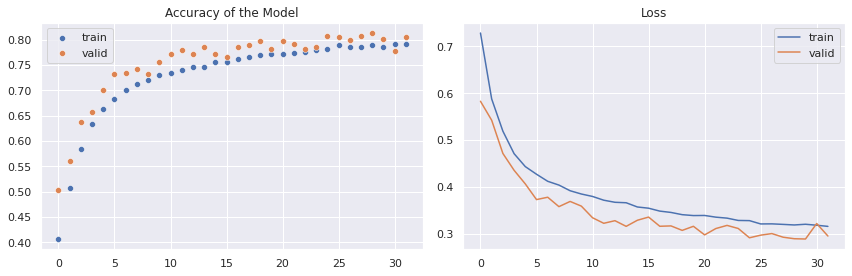

In [ ]:
sns.set()
fig = plt.figure(0, (12, 4))

ax = plt.subplot(1, 2, 1)
sns.scatterplot(history.epoch, history.history['accuracy'], label='train')
sns.scatterplot(history.epoch, history.history['val_accuracy'], label='valid')
plt.title('Accuracy of the Model')
plt.tight_layout()

ax = plt.subplot(1, 2, 2)
sns.lineplot(history.epoch, history.history['loss'], label='train')
sns.lineplot(history.epoch, history.history['val_loss'], label='valid')
plt.title('Loss')
plt.tight_layout()


plt.savefig('epoch_history_dcnn.png') 

plt.show()

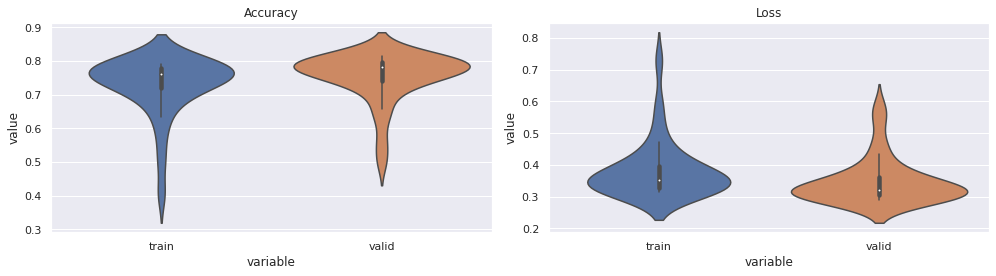

In [ ]:
df_accu = pd.DataFrame({'train': history.history['accuracy'], 'valid': history.history['val_accuracy']})
df_loss = pd.DataFrame({'train': history.history['loss'], 'valid': history.history['val_loss']})

fig = plt.figure(0, (14, 4))
ax = plt.subplot(1, 2, 1)
sns.violinplot(x="variable", y="value", data=pd.melt(df_accu), showfliers=False)
plt.title('Accuracy')
plt.tight_layout()

ax = plt.subplot(1, 2, 2)
sns.violinplot(x="variable", y="value", data=pd.melt(df_loss), showfliers=False)
plt.title('Loss')
plt.tight_layout()

plt.savefig('performance_dist.png')
plt.show()


# Confusion Matrix

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


total wrong validation predictions: 413


[1 2 2 ... 0 2 0] [2 2 2 ... 0 2 0]


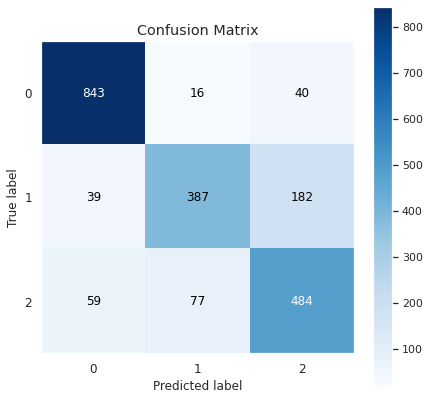

In [ ]:

yhat_valid = model.predict_classes(X_valid)
scikitplot.metrics.plot_confusion_matrix(np.argmax(y_valid, axis=1), yhat_valid, figsize=(7,7))
plt.savefig("confusion_matrix_dcnn.png")

print(f'total wrong validation predictions: {np.sum(np.argmax(y_valid, axis=1) != yhat_valid)}\n\n')
print(np.argmax(y_valid, axis=1), yhat_valid)

In [ ]:
mapper = {
    0: "happy",
    1: "sad",
    2: "neutral",
}

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


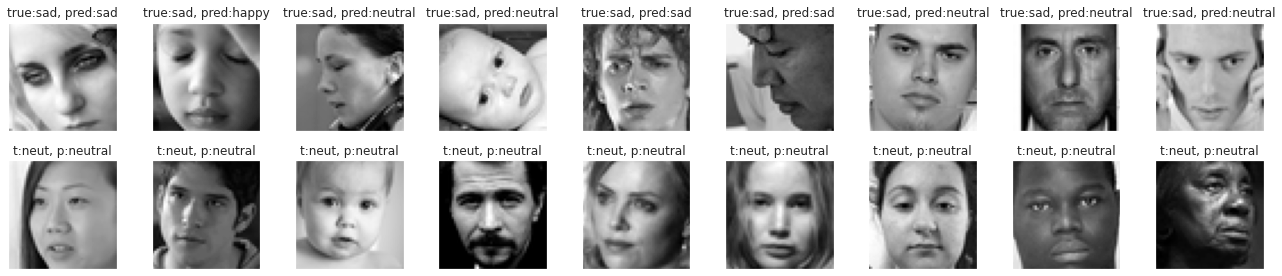

In [ ]:
np.random.seed(2)
random_sad_imgs = np.random.choice(np.where(y_valid[:, 1]==1)[0], size=9)
random_neutral_imgs = np.random.choice(np.where(y_valid[:, 2]==1)[0], size=9)

fig = plt.figure(1, (18, 4))

for i, (sadidx, neuidx) in enumerate(zip(random_sad_imgs, random_neutral_imgs)):
        ax = plt.subplot(2, 9, i+1)
        sample_img = X_valid[sadidx,:,:,0]
        ax.imshow(sample_img, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f"true:sad, pred:{mapper[model.predict_classes(sample_img.reshape(1,48,48,1))[0]]}")

        ax =plt.subplot(2, 9, i+10)
        sample_img = X_valid[neuidx,:,:,0]
        ax.imshow(sample_img, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f"t:neut, p:{mapper[model.predict_classes(sample_img.reshape(1,48,48,1))[0]]}")

        plt.tight_layout()

In [ ]:
!pip install h5py

# Access webcam

In [ ]:

from keras.models import load_model
model = load_model('model.h5')


In [ ]:
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()

In [ ]:
import os
import cv2
import numpy as np
from keras.models import model_from_json
from keras.preprocessing import image


In [ ]:
yaml_file = open('model.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
model.load_weights('model.h5')
face_haar_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') 

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
image_file = take_photo()






<IPython.core.display.Javascript object>

400 300


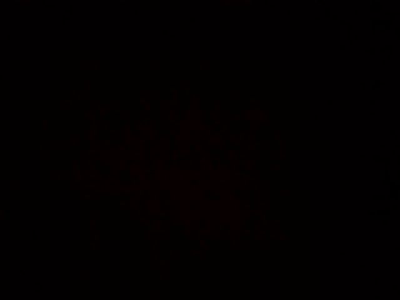

In [ ]:
image = cv2.imread(image_file, cv2.IMREAD_UNCHANGED)
image = cv2.imread(image_file)

# resize it to have a maximum width of 400 pixels
image = imutils.resize(image, width=400)
(h, w) = image.shape[:2]
print(w,h)
cv2_imshow(image)

In [ ]:
!wget -N https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
!wget -N https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel

--2021-04-02 18:46:35--  https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28104 (27K) [text/plain]
Saving to: ‘deploy.prototxt’

deploy.prototxt     100%[===================>]  27.45K  --.-KB/s    in 0.001s  

Last-modified header missing -- time-stamps turned off.
2021-04-02 18:46:35 (31.0 MB/s) - ‘deploy.prototxt’ saved [28104/28104]

--2021-04-02 18:46:36--  https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubus

In [ ]:
print("[INFO] loading model...")
prototxt = 'deploy.prototxt'
model = 'res10_300x300_ssd_iter_140000.caffemodel'
net = cv2.dnn.readNetFromCaffe(prototxt, model)

[INFO] loading model...


In [ ]:

for i in range(0, img_array.shape[2]):

	# extract the confidence (i.e., probability) associated with the prediction
	confidence = img_array[0, 0, i, 0]

	# filter out weak detections by ensuring the `confidence` is
	# greater than the minimum confidence threshold
	if confidence > 0.5:   
		# compute the (x, y)-coordinates of the bounding box for the object
		box = img_array[0, 0, i, 0:7] * np.array([w, h, w, h])
		(startX, startY, endX, endY) = box.astype("int")
		# draw the bounding box of the face along with the associated probability
		text = "{:.2f}%".format(confidence * 100)
		y = startY - 10 if startY - 10 > 10 else startY + 10
		cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
		cv2.putText(image, text, (startX, y),
			cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)

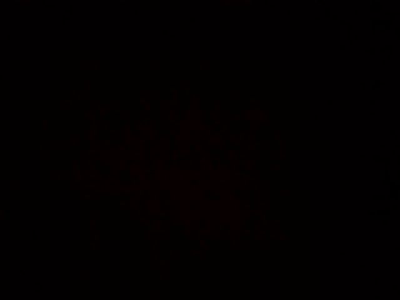

     |████████████████████████████████| 2.1MB 9.0MB/s 
     |████████████████████████████████| 102kB 12.8MB/s 
     |████████████████████████████████| 163kB 46.9MB/s 
     |████████████████████████████████| 133kB 49.0MB/s 
     |████████████████████████████████| 71kB 10.0MB/s 


In [ ]:

cv2_imshow(image)
!pip install -qq wandb
!pip install opencv-python
!pip install tensorflow
!pip install portpicker

In [ ]:
# Download the frontend build
!rm -rf build
!wget -q https://github.com/vanpelt/emotion-detector/releases/download/stable/frontend.zip
!unzip -q frontend.zip

In [ ]:
# Install tensorflowjs in a virtualenv
%pip install -q virtualenv
!virtualenv --no-site-packages venv && . venv/bin/activate && pip install -q tensorflowjs

     |████████████████████████████████| 7.2MB 8.0MB/s 
     |████████████████████████████████| 337kB 56.7MB/s 
usage: virtualenv [--version] [--with-traceback] [-v | -q] [--read-only-app-data] [--app-data APP_DATA] [--reset-app-data] [--upgrade-embed-wheels] [--discovery {builtin}] [-p py] [--try-first-with py_exe]
                  [--creator {builtin,cpython3-posix,venv}] [--seeder {app-data,pip}] [--no-seed] [--activators comma_sep_list] [--clear] [--no-vcs-ignore] [--system-site-packages] [--symlinks | --copies] [--no-download | --download]
                  [--extra-search-dir d [d ...]] [--pip version] [--setuptools version] [--wheel version] [--no-pip] [--no-setuptools] [--no-wheel] [--no-periodic-update] [--symlink-app-data] [--prompt prompt] [-h]
                  dest
virtualenv: error: unrecognized arguments: --no-site-packages
SystemExit: 2
